# SEN163A – Assignment 2 - Large-scale Internet Data Analysis


In [2]:
# FIGURE OUTPUT CONFIGURATION FOR JUPYTER NOTEBOOK
import matplotlib
matplotlib.rcParams["figure.facecolor"] = "w"
matplotlib.rcParams['figure.figsize'] = [24, 12]
matplotlib.rcParams['figure.dpi'] = 120

## Changelog
- Added new sections:
  - Introduction
- Improved commenting and readability of code cells
- Changed figure output formatting
- Removed time estimation (not used)
- Removed IPv6 calculations, as they are not needed in the final report.
- Removed the IPv4 computations, as we use a module that takes the dataset.

## Group 14
- Antonio Sanchez Martin - ''5245834''
- Felix Unger - ''5673631''
- Jeroen van Paassen - ''4720970''
- Yunus Emre Torlak - '' 5597668''

#### Functional part
[] a. You mention only a few internal inconsistencies (missing data, wrong format, etc.) of the AS and probe datasets each separately. Think also about things that may go wrong (limitations) about the *combination* of them.
- There might be more information in one dataset than in the other. So by combining them, we might lose information as we only take the common entries.

[] b. Your response is \"Number of probes in the RIPE, probe and AS datasets within the EU: 60087\". But in this question we are not interested in a number of probes, but in the number of ASN's. Also, for this question, it is not necessary to merge the RIPE dataset, only the AS and probe datasets are sufficient.

[] c. d. I think I have an idea what's wrong with your answer to d:  you calculated mean latency for a WHOLE COUNTRY. You should have calculated mean latency per ASN, and then choose ONE ASN PER COUNTRY (the one with smallest mean latency for ips in that country.).

[] e. Taking just four best countries is no good. You should consider each possible combination of four ASN's. For each combination, measure the total latency of that combination to all countries. Pick the best combination of four ASNs.

#### Report Quality\

[] Report structure is untidy and a bit unsatisfactory: missing an introduction, conclusion, section about problem description, dataset description...

[] Some typos and grammatical issues, the report would benefit from an extra round of proofreading.

[] Your dataset description could be improved by talking a bit more about the context: where the datasets come from, how they related to each other, which pieces are relevant to you and which are not."

## Introduction

The Groote Nationale Investeer Bank (GNI Bank) is a large European bank and the bank is preparing to enter the mobile banking sector. For this project, which requires large investments, first of all, a research in the computational field is required. Considering that the locations of the datacenters to be used will directly affect the performance of the system, one of the most important research points will be the subject of the datacenter's location to be selected. GNI Bank hired our data analytics team  (Group 14). This report is an advisory report which will help to GNI Bank for making decisions about datacenter location.

## Problem description
The GNI bank doesn't know where the best location for a datacenter in the EU is. This will need to be determined based on their company data, making the allocation of the datacenter efficient.

**TODO**: Elaborate more

## Dataset description
It is also important to note where the datasets come from, how they related to each other, which pieces are relevant to you and which are not. The RIPE dataset contains ping measurements executed by a select number of probes to most IPv4 addresses in the world. One day of measurements are stored in 24 files.
The IP location dataset connects the IP's of all the data with certain locations. This dataset is relevent because it connects the other datasets to locations over the world.
The AS and probe dataset contain information about the ASNs and the corresponding probes. 


### Probe Dataset
First of all we opened the probe data set as a dataframe using the pickle module. As a first step we received the number of columns and rows. 
As also shown after sorting by values beneath, there are two columns named: 
  - prb_id
  - `ASN`

In [3]:
# IMPORT PROBE DATASET
import pickle

with open("./datasets/probe_dataset.pkl", 'rb') as file:
    df_probe = pickle.load(file)

print(df_probe.shape)
df_probe.head()

(11008, 2)


,prb_id,ASN
0,1,AS3265
1,2,AS1136
2,3,AS3265
3,6,AS6830
4,8,AS3265


For this part, we will be looking into missing values and if data is correct/consistent. We try to find such limitations and describe them with the help of the code that is shown. We will do this in a couple of ways, like computing the amount of rows with 0 IPs, looking at the types of AS and by making a plot with the numIPs with the frequencies. Also, we consider if the available columns/data are sufficient for the analysis.

As can be seen in the table below, the probe dataset has missing probe ID's, as the probe ID's have been put in order by their number. These could be seen as missing data/values in the dataset.

In [4]:
#sorting ascending by prb_id -> Many Probe ID's missing inbetween
df_probe.sort_values(by='prb_id', ascending=True)

,prb_id,ASN
0,1,AS3265
1,2,AS1136
2,3,AS3265
3,6,AS6830
4,8,AS3265
...,...,...
11003,1000242,AS49432
11004,1000243,AS6830
11005,1000244,AS7155
11006,1000245,AS15802


### AS Dataset
The AS dataset consists of 5 columns:
  - `ASN`
  - Country code
  - Network name
  - Total number of IPs in network
  - Type of network
This datset gives us the number of IPs and the locations. The output of the code below shows the data of the first and last couple of rows from the AS dataset.

In [5]:
# IMPORT AS DATASET
import pandas
df_AS = pandas.read_pickle("./datasets/AS_dataset.pkl")
df_AS = df_AS.rename(columns={"type": "type_AS"})
df_AS.head()

,ASN,Country,Name,NumIPs,type_AS
0,AS55330,AF,AFGHANTELECOM GOVERNMENT COMMUNICATION NETWORK,"50,432",hosting
1,AS17411,AF,Io Global Services Pvt. Limited,"13,568",business
2,AS55424,AF,Instatelecom Limited,"13,312",business
3,AS38742,AF,AWCC,"11,520",isp
4,AS131284,AF,Etisalat Afghan,"10,240",isp


In [6]:
df_AS.tail()

,ASN,Country,Name,NumIPs,type_AS
60117,AS37332,ZW,Zimbabwe Online,0,education
60118,AS37344,ZW,ZIMBABWE OPEN UNIVERSITY,0,business
60119,AS37355,ZW,Zimbabwe Internet Exchange,0,business
60120,AS37391,ZW,Esmalo Enterprises,0,business
60121,AS37485,ZW,Data Control and Systems,0,business


Next, we are looking at missing values in the probe and AS dataset, which is analyzed with the upcoming pieces of code.
As you can see, the output reveals that there are no missing values when we try to detect it in the dateset. So while there are missing probe ID's in the probe dataset, the probe and AS dataset doesn't seem to have other missing data.

In [7]:
# SEARCH FOR MISSING (I.E. NAN) VALUES IN AS
listings = df_AS
print(listings.isna())
# look for any missing values in any column
print(f"Are there missing values?: {listings.isna().any().any()}")

         ASN  Country   Name  NumIPs  type_AS
0      False    False  False   False    False
1      False    False  False   False    False
2      False    False  False   False    False
3      False    False  False   False    False
4      False    False  False   False    False
...      ...      ...    ...     ...      ...
60117  False    False  False   False    False
60118  False    False  False   False    False
60119  False    False  False   False    False
60120  False    False  False   False    False
60121  False    False  False   False    False

[60122 rows x 5 columns]
Are there missing values?: False


In [8]:
# SEARCH FOR MISSING (I.E. NAN) VALUES IN PROBE
listings = df_probe
print(listings.isna())
print(f"Are there missing values?: {listings.isna().any().any()}")

       prb_id    ASN
0       False  False
1       False  False
2       False  False
3       False  False
4       False  False
...       ...    ...
11003   False  False
11004   False  False
11005   False  False
11006   False  False
11007   False  False

[11008 rows x 2 columns]
Are there missing values?: False


We also want to check how many rows in the AS dataset exist where the value for NumIPs is equal to 0. This would mean that the ASNs don't have IP numbers, which would be strange in this dataset.
The output says that there a 15107 of these ASNs, which is a lot considering this dataset has about 60000 total rows. The conclusion here is that about 25% of all rows does not include a single IP address.

In [9]:
# only use a subset with numips==0
df_AS_only_zero = df_AS[df_AS["NumIPs"]=='0'] # subset with condition
print(len(df_AS_only_zero.index)) # count number of rows in dataframe
df_AS_only_zero.head()

15107


,ASN,Country,Name,NumIPs,type_AS
50,AS133141,AF,NetZone Limited,0,business
51,AS139697,AF,Mikrogate ICT Services Company,0,education
52,AS45521,AF,Multinet Afghanistan AS in Kandaghar,0,business
53,AS45784,AF,Multinet Afghanistan AS in Herat,0,business
54,AS45790,AF,Multinet Afghanistan AS in Mazar-E-Sharif,0,isp


Next, we check all the different values in the dataset for the variable type_AS, to see if there are strange occurrences.
There are 5 different values with one being unknown, which could be seen as incomplete data or a missing value.

In [10]:
# look at all the possible values for type_AS
print(df_AS['type_AS'].unique())

['hosting' 'business' 'isp' 'education' 'unk']


Lastly, we plot a histogram to visualize the AS dataset better. For the plot, we look at the amount of IP addresses involved with one ASN and look how frequent each number of IPs per ASN is occurring in the dataset. With this we try to see for significant values.
In the histogram you can see that there are strong outliers in the dataset with extremely high amount of IP addresses that occur frequently. Overal, the histogram shows that the data is reasonably balanced and that the is a reoccurring theme where the low amount of IPs is most frequent with a lot of ASNs.

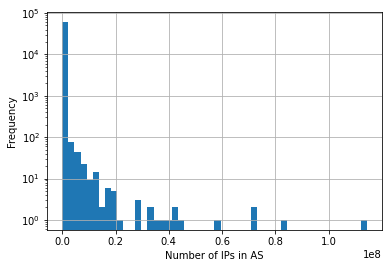

In [11]:
# plot the number of IP addresses (histogram)
import matplotlib.pyplot as plt
df_AS['NumIPs'].str.replace(",","").astype(int).plot.hist(bins=50, log=True)
plt.savefig('test.png') # save it as file
plt.xlabel('Number of IPs in AS')
plt.grid('minor')
plt.show()

#Conclusion Question 1:
There are no missing values in the AS and probe dataset that we detected, while there were missing probe IDs in the probe dataset.
About 25% of all rows do not include a single IP, meaning the NumIPs is equal to zero.
Some type_AS data is defined as unknown, meaning this data is not available in the AS dataset.
The combination of these things could lead to limitations in the analysis, since some ASN's could not be coupled due to missing probe ID's.

The available columns provide enough information for this analysis, because we are able to link it to the other provided datasets and the AS dataset provides sufficient information about the ASNs to determine suitable hosts in the EU.

### RIPE

The RIPE dataset is visualized with the cells below. The RIPE dataset contains ping measurements. This dataset contains a lot of information about these measurements that are executed by a select number of probes to most IPv4 addresses in the world. Some of the latencies in the RIPE dataset equal -1, which is strange. When the value of last time synchronized is eqaul to -1, it means that the probe does not know whether it is in sync with a controller.
We check the unique values for 'from' and we also check if `dst_name` and `dst_addr` are always the same, which is not the case according to the output.

In [12]:
# IMPORT RIPE DATASET
import timeit
import pandas

file_location = './datasets/ping-2022-04-01T2000.bz2'
# Importing
df_ripe = pandas.read_json(file_location, lines = True, nrows = 1e5)
df_ripe = df_ripe.rename(columns={"type": "type_ping"})
df_ripe.head()

,fw,mver,lts,dst_name,af,dst_addr,src_addr,proto,ttl,size,...,avg,msm_id,prb_id,timestamp,msm_name,from,type_ping,step,group_id,ttr
0,5040,2.4.1,-1,45.33.72.12,4,45.33.72.12,207.201.213.18,ICMP,51.0,32,...,40.828299,1029,1003781,2022-04-01 20:09:22,Ping,207.201.213.18,ping,240.0,NaN,NaN
1,5040,2.4.1,-1,104.237.152.132,4,104.237.152.132,207.201.213.18,ICMP,47.0,32,...,79.509443,1028,1003781,2022-04-01 20:09:21,Ping,207.201.213.18,ping,240.0,NaN,NaN
2,5040,2.4.1,-1,2001:67c:2e8:11::c100:133c,6,2001:67c:2e8:11::c100:133c,2605:c1c0:1:0:4262:31ff:fe13:fa6a,ICMP,48.0,32,...,110.923868,2031,1003781,2022-04-01 20:10:00,Ping,2605:c1c0:1:0:4262:31ff:fe13:fa6a,ping,240.0,NaN,NaN
3,5040,2.4.1,-1,198.97.190.53,4,198.97.190.53,207.201.213.18,ICMP,54.0,32,...,8.290477,1015,1003781,2022-04-01 20:09:19,Ping,207.201.213.18,ping,240.0,NaN,NaN
4,5040,2.4.1,-1,192.36.148.17,4,192.36.148.17,207.201.213.18,ICMP,54.0,32,...,174.318344,1005,1003781,2022-04-01 20:09:59,Ping,207.201.213.18,ping,240.0,NaN,NaN


In [13]:
# Check how many "from" addresses are unique
print(f"There are {df_ripe['from'].nunique()} unique 'from' addresses")

There are 5469 unique 'from' addresses


In [14]:
# dst_name vs dst_addr
print(f"Are all 'dst_name' and 'dst_addr' the same? -> {df_ripe['dst_name'].equals(df_ripe['dst_addr'])}")

Are all 'dst_name' and 'dst_addr' the same? -> False


### IP datasets

#### IPv4 dataset
The IP addresses are in integer format.
Lots of addresses don't specify a country_code or country_name. Those are removed.

Regarding the data structure of the IPv4-dataset, there are four columns:
- `ip_to` describes the the lower boundary for a sample of IP-adresses
- `ip_to` describes the upper boundary for a sample of IP-adresses 
- `country_code` and `country_name` describe the country which belongs to the IP samples defined with `ip_to` and `ip_to`

Since the IP data was given as integers, we converted them into IP adresses format.

In [15]:
# IMPORT IPV4 DATASET 
import pandas as pd
df_ip = pd.read_csv("datasets/IP2LOCATION-LITE-DB1.CSV", names=["ip_from", "ip_to", "country_code", "country_name"])
df_ip.drop(df_ip[df_ip["country_name"] == '-'].index, axis=0, inplace=True) # Drop rows if there is no country code
df_ip.dropna(inplace=True) # drop emtpy rows
df_ip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204928 entries, 1 to 208646
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ip_from       204928 non-null  int64 
 1   ip_to         204928 non-null  int64 
 2   country_code  204928 non-null  object
 3   country_name  204928 non-null  object
dtypes: int64(2), object(2)
memory usage: 7.8+ MB


In [16]:
# ADD COLUMNS FOR IP STRING FORMATTING
import ipaddress
for ip in ('ip_from', 'ip_to',):
    df_ip[f"{ip}_formatted"] = df_ip[ip].apply(ipaddress.ip_address)
print(len(df_ip.index))
df_ip.head()

204928


,ip_from,ip_to,country_code,country_name,ip_from_formatted,ip_to_formatted
1,16777216,16777471,US,United States of America,1.0.0.0,1.0.0.255
2,16777472,16778239,CN,China,1.0.1.0,1.0.3.255
3,16778240,16779263,AU,Australia,1.0.4.0,1.0.7.255
4,16779264,16781311,CN,China,1.0.8.0,1.0.15.255
5,16781312,16785407,JP,Japan,1.0.16.0,1.0.31.255


## Autonomous Systems within the EU

The second question of the assignment focused on finding the number ***m*** of Autonomous Systems provided in the *AS data set* and *probe data set* that can be used for hosting services in the European Union. For those AS's was also required, to have probes in the *RIPE data set*. As result it was demanded to deliver the ***m*** possible AS's sorted in ascending order, mentioning the first and last three including ASN, name and country.

In order to solve this task, we firstly decided to merge *probe data set* with the *AS data set* to have have all potential AS with their numbers concluded in one data set as a basis. To realize this merge, we utilized the `pandas.DataFrame.merge`-method which simply merges two different data frames and stores them in a new dataframe, in our case `df_combined`.

In [17]:
# COMBINED -> AS + PROBE
df_combined = df_AS.merge(df_probe, how='inner', on='ASN')
df_combined.head()

,ASN,Country,Name,NumIPs,type_AS,prb_id
0,AS21246,AL,IPKO Telecommunications LLC,"77,824",business,1237
1,AS21246,AL,IPKO Telecommunications LLC,"77,824",business,21795
2,AS42313,AL,Albtelecom Sh.a.,"70,912",business,2851
3,AS42313,AL,Albtelecom Sh.a.,"70,912",business,11779
4,AS42313,AL,Albtelecom Sh.a.,"70,912",business,21678


In [18]:
print(f"There are {df_combined['ASN'].nunique()} unique ASNs in the combinaton of the probe and AS datasets")

There are 3493 unique ASNs in the combinaton of the probe and AS datasets


To evaluate whether one of these in the new merged dataframe combined AS's is capable to host inside the European Union, we need to decide whether the AS is located in the European Union or not. To seperate European countries from Non-European countries, we used a csv sheet which matches European country codes with the countries. Providing an reading overview we converted the csv to a dataframe with the well known `pandas.read_csv`-method. 



In [19]:
# IMPORT DATAFRAME WITH EU COUNTRY CODES
df_country_codes = pandas.read_csv("./datasets/eu_country_codes.csv") # EU countries with codes
df_country_codes.head()

,ISO2,Country name
0,AL,Albania
1,AT,Austria
2,BA,Bosnia and Herzegovina
3,BE,Belgium
4,BG,Bulgaria


Knowing which AS of the *probe data set* and the *AS data set* are in the European Union, we merged now the *RIPE data set* with the already merged data set `df_combined` in a new data set `df_final`. To receive the ASN's for the European countries based on the less common understandable country code, we used the `pandas.DataFrame.isin`-method to get notice about all European ASN's in this data frame. All European ASN's are stored in a new data frame, in our case `df_final_EU` and sorted ascendung using the method `pandas.DataFrame.sort_values` to sort the data frame according to the ASN-values ascending.

In [20]:
# MERGE ALL DATASETS (except IP)
df_final = df_combined.merge(df_ripe, how='inner', on='prb_id') # Join based on prb_id
df_final_EU = df_final[df_final["Country"].isin(df_country_codes["ISO2"])] # Only EU countries
df_final_EU.sort_values(by="ASN", ascending=True, inplace=True)
df_final_EU.head()

/var/folders/j_/fksmwvvx4_3168_scxg6_7hh0000gn/T/ipykernel_11351/1563963369.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_EU.sort_values(by="ASN", ascending=True, inplace=True)


,ASN,Country,Name,NumIPs,type_AS,prb_id,fw,mver,lts,dst_name,...,max,avg,msm_id,timestamp,msm_name,from,type_ping,step,group_id,ttr
29041,AS1101,NL,SURFnet bv,"1,838,592",isp,11690,5040,2.4.1,3,2a03:ac40:1:5::2,...,3.942770,3.909716,27225895,2022-04-01 20:02:48,Ping,2001:67c:6ec:201:fa1a:67ff:fe4d:813d,ping,240.0,27225894.0,NaN
29050,AS1101,NL,SURFnet bv,"1,838,592",isp,11690,5040,2.4.1,28,2a01:4f8:110:13cd::2,...,10.571343,10.553968,2017,2022-04-01 20:03:13,Ping,2001:67c:6ec:201:fa1a:67ff:fe4d:813d,ping,240.0,NaN,NaN
29049,AS1101,NL,SURFnet bv,"1,838,592",isp,11690,5040,2.4.1,28,2001:500:2d::d,...,0.907261,0.883684,2012,2022-04-01 20:02:38,Ping,2001:67c:6ec:201:fa1a:67ff:fe4d:813d,ping,240.0,NaN,NaN
29048,AS1101,NL,SURFnet bv,"1,838,592",isp,11690,5040,2.4.1,31,2a00:1c28:1:fafa:a1::2,...,39.690529,39.654459,22401745,2022-04-01 20:03:16,Ping,2001:67c:6ec:201:fa1a:67ff:fe4d:813d,ping,240.0,22401744.0,NaN
29047,AS1101,NL,SURFnet bv,"1,838,592",isp,11690,5040,2.4.1,20,81.27.254.54,...,42.833117,40.781839,22401742,2022-04-01 20:03:05,Ping,145.220.0.33,ping,240.0,22401741.0,NaN


As defined in the task, the number ***m*** of potential AS in the European Union was required. To receive this we counted the number of rows and dropped afterwards remained ASN-duplicates with the method `pandas.DataFrame.drop_duplicates`. In total we received **X** potential AS's within the European Union. 

In [21]:
print(f"Number of ASNs in the RIPE, probe and AS datasets within the EU: {df_final_EU['ASN'].nunique()}")

Number of ASNs in the RIPE, probe and AS datasets within the EU: 484


As required we also provided the top three and last three ASN's when sorted ascending including their name and country. For this we used the `pandas.DataFrame.head`- and `pandas.DataFrame.tail`-method including dropping duplicates before. The ASN's including name and country are as listed beneath.

In [22]:
# Top 3 (unique) elements
print("Top 3 ASNs by order")
df_final_EU.loc[:, ["ASN", "Name", "Country"]].drop_duplicates(subset=['ASN']).head(3)

Top 3 ASNs by order


,ASN,Name,Country
29041,AS1101,SURFnet bv,NL
28834,AS1103,SURFnet bv,NL
2982,AS1109,Universitaet Salzburg,AT


In [23]:
# Bottom 3 (unique) elements
print("Bottom 3 ASNs by order")
df_final_EU.loc[:, ["ASN", "Name", "Country"]].drop_duplicates(subset=['ASN']).tail(3)

Bottom 3 ASNs by order


,ASN,Name,Country
9179,AS9158,Telenor A/S,DK
5193,AS9208,WIN S.A.,BE
19610,AS9211,Nawork Internet Informationssysteme GmbH,DE


To crosscheck if all the merging commands worked properly, we selected the first possible ASN of our result to see how the merge behaved. As we can see, the data related to the ASN **AS1101** is in all different original data frames provided consistent including the country code. 

In [24]:
# A quick test that this worked (i.e. that the merge actually behaves as expected)
prb_id = 6031
df_final_EU[df_final_EU['prb_id'] == prb_id].loc[:, ["prb_id", "ASN", "Name", "NumIPs", "Country", "type_AS"]]

,prb_id,ASN,Name,NumIPs,Country,type_AS


In [25]:
df_probe[df_probe['prb_id'] == prb_id].head()

,prb_id,ASN
1454,6031,AS1101


In [26]:
df_combined[df_combined['prb_id'] == prb_id].head()

,ASN,Country,Name,NumIPs,type_AS,prb_id
5937,AS1101,NL,SURFnet bv,"1,838,592",isp,6031


## c. Regarding a single hour *RIPE data set* - find all entries where the hosting ASN has *type AS* and the *target IPv4* is from an EU country.

**UPDATE**

Since in order to this task we only investigated on targets for IPv4-adresses, we first of all deleted all rows with IPv6-adresses as destination. This inclueded using the method `pandas.DataFrame.dropna` which allows to delete rows or columns according to a certain value. In our case the unique marker was identifying all IPv6-adresses with the ":", to delete related rows. 

For later comparison, the `df_final` dataframe (i.e. the combination of everything except the the IP dataframe) has been extended. Destination address (`dst_addr`) was converted to an int-value for easier comparison. Also we checked if the length was after dropping Na the same as before dropping, which was apparently equal with 36597 rows. Also 

In [27]:
import ipaddress
# Remove all IPv6 addresses, as they are not required for the exercise
df_final.dropna(subset=["dst_addr"], inplace=True)
df_final = df_final[~df_final["dst_addr"].str.contains(":")]
# Drop NaNs
print(f"Length before droping Na: {len(df_final.index)}")
df_final.dropna(inplace=True, subset=['dst_addr']) # there were some NaN Values 
print(f"Length after droping Na: {len(df_final.index)}")
# Convert all IPs to ints for comparison
df_final["dst_addr_int"] = df_final["dst_addr"].apply(lambda ip_string: int(ipaddress.ip_address(ip_string))) # convert ip address to int
df_final.reset_index(inplace=True)
df_final.loc[:, ["dst_addr", "dst_addr_int"]].head(10)

Length before droping Na: 31182
Length after droping Na: 31182


,dst_addr,dst_addr_int
0,199.7.83.42,3339146026
1,210.56.16.10,3526889482
2,104.237.152.132,1760401540
3,159.253.17.197,2684162501
4,4.4.2.2,67371522
5,193.106.119.18,3244979986
6,199.7.91.13,3339148045
7,139.162.27.28,2342656796
8,35.228.29.222,602152414
9,202.12.27.33,3389791009


To figure out if an AS type tried to address within an hour a destionation IPv4-adress, we need to investigate on the timestamps. Therefore we sorted the *Ripe data set* after timestamp ascending.  

In [28]:
df_ripe_temp = df_ripe.sort_values(by=['timestamp'], ascending=True)
print(f"Time between first and last entry: {df_ripe_temp.iloc[-1]['timestamp']-df_ripe_temp.iloc[0]['timestamp']}")

Time between first and last entry: 0 days 00:58:01


Then we selected values of the *RIPE data set* which are only located in EU countries. For that we import the IP2Location module and tested a random IP-adress. The test worked succesfully receiving the country code 'FR' for France. 

In [29]:
# Module for dealing with the database
import IP2Location
ip_database = IP2Location.IP2Location('./datasets/IP2LOCATION-LITE-DB1.BIN')
# Example
ip_database.get_country_short('1.179.112.0') # this should be FR

'FR'

Utilizing the IPLocation tool we now modified the dataframe `df_final` with all IPv4-adresses that are destination adress within the European Union. 

In [30]:
df_final["dst_addr_country"] = df_final["dst_addr"].apply(lambda addr: ip_database.get_country_short(addr))
df_final.head()

,index,ASN,Country,Name,NumIPs,type_AS,prb_id,fw,mver,lts,...,msm_id,timestamp,msm_name,from,type_ping,step,group_id,ttr,dst_addr_int,dst_addr_country
0,0,AS42313,AL,Albtelecom Sh.a.,"70,912",business,11779,5040,2.4.1,87,...,1008,2022-04-01 20:01:20,Ping,79.106.99.242,ping,240.0,NaN,NaN,3339146026,US
1,1,AS42313,AL,Albtelecom Sh.a.,"70,912",business,11779,5040,2.4.1,113,...,2926813,2022-04-01 20:01:46,Ping,79.106.99.242,ping,240.0,2926813.0,NaN,3526889482,PK
2,2,AS42313,AL,Albtelecom Sh.a.,"70,912",business,11779,5040,2.4.1,36,...,1028,2022-04-01 20:04:04,Ping,79.106.99.242,ping,240.0,NaN,NaN,1760401540,US
3,3,AS42313,AL,Albtelecom Sh.a.,"70,912",business,11779,5040,2.4.1,9,...,9181088,2022-04-01 20:02:50,Ping,79.106.99.242,ping,240.0,9181087.0,NaN,2684162501,EE
4,4,AS42313,AL,Albtelecom Sh.a.,"70,912",business,55857,5040,2.4.1,8,...,25706666,2022-04-01 20:02:46,Ping,217.24.242.253,ping,240.0,25706666.0,NaN,67371522,US


To figure out whether these ASN's that are of the type 'hosting' and are a receiving IPv4-address are within the European Union, we used the country codes again to match it to countries. 

In [31]:
# Select only hosting types
df_final_hosting = df_final[df_final["type_AS"] == 'hosting']
df_final_hosting
# Select only if the dst_addr_country is in the EU
df_final_hosting_destEU = df_final_hosting[df_final_hosting["dst_addr_country"].isin(df_country_codes["ISO2"])]
df_final_hosting_destEU.head()

,index,ASN,Country,Name,NumIPs,type_AS,prb_id,fw,mver,lts,...,msm_id,timestamp,msm_name,from,type_ping,step,group_id,ttr,dst_addr_int,dst_addr_country
56,77,AS263777,AR,COOPERATIVA TELEFONICA Y OSPA DE TOSTADO LDA.,"3,072",hosting,6633,5040,2.4.1,39,...,10683789,2022-04-01 20:06:13,Ping,138.204.7.245,ping,240.0,10683788.0,NaN,3165444630,IT
58,79,AS263777,AR,COOPERATIVA TELEFONICA Y OSPA DE TOSTADO LDA.,"3,072",hosting,6633,5040,2.4.1,40,...,23602763,2022-04-01 20:06:14,Ping,138.204.7.245,ping,240.0,23602762.0,NaN,3118141394,FR
59,81,AS263777,AR,COOPERATIVA TELEFONICA Y OSPA DE TOSTADO LDA.,"3,072",hosting,6633,5040,2.4.1,40,...,19850040,2022-04-01 20:06:14,Ping,138.204.7.245,ping,240.0,19850039.0,NaN,521047940,IT
61,84,AS263777,AR,COOPERATIVA TELEFONICA Y OSPA DE TOSTADO LDA.,"3,072",hosting,6633,5040,2.4.1,41,...,19952708,2022-04-01 20:06:15,Ping,138.204.7.245,ping,240.0,19952707.0,NaN,773239869,NL
67,98,AS263777,AR,COOPERATIVA TELEFONICA Y OSPA DE TOSTADO LDA.,"3,072",hosting,6633,5040,2.4.1,55,...,23857334,2022-04-01 20:06:29,Ping,138.204.7.245,ping,240.0,23857333.0,NaN,3274397580,EE


MENTION THE -1 IN AVG

In [32]:
# Remove all latencies that are -1
df_final_hosting_destEU.drop(df_final_hosting_destEU[df_final_hosting_destEU["avg"] == -1].index, inplace=True) 
df_final_hosting_destEU.head()

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,index,ASN,Country,Name,NumIPs,type_AS,prb_id,fw,mver,lts,...,msm_id,timestamp,msm_name,from,type_ping,step,group_id,ttr,dst_addr_int,dst_addr_country
56,77,AS263777,AR,COOPERATIVA TELEFONICA Y OSPA DE TOSTADO LDA.,"3,072",hosting,6633,5040,2.4.1,39,...,10683789,2022-04-01 20:06:13,Ping,138.204.7.245,ping,240.0,10683788.0,NaN,3165444630,IT
59,81,AS263777,AR,COOPERATIVA TELEFONICA Y OSPA DE TOSTADO LDA.,"3,072",hosting,6633,5040,2.4.1,40,...,19850040,2022-04-01 20:06:14,Ping,138.204.7.245,ping,240.0,19850039.0,NaN,521047940,IT
61,84,AS263777,AR,COOPERATIVA TELEFONICA Y OSPA DE TOSTADO LDA.,"3,072",hosting,6633,5040,2.4.1,41,...,19952708,2022-04-01 20:06:15,Ping,138.204.7.245,ping,240.0,19952707.0,NaN,773239869,NL
67,98,AS263777,AR,COOPERATIVA TELEFONICA Y OSPA DE TOSTADO LDA.,"3,072",hosting,6633,5040,2.4.1,55,...,23857334,2022-04-01 20:06:29,Ping,138.204.7.245,ping,240.0,23857333.0,NaN,3274397580,EE
68,100,AS263777,AR,COOPERATIVA TELEFONICA Y OSPA DE TOSTADO LDA.,"3,072",hosting,6633,5040,2.4.1,58,...,10404698,2022-04-01 20:06:32,Ping,138.204.7.245,ping,240.0,10404697.0,NaN,3119080547,FR


## d. What is the average latency for each country-AS combination?
In order to correctly calculate the average of the data, all the measurements in country Y belonging to the X ASN must be summed and divided by that number before averaging. In order to achieve this, it is necessary to store all measurement data outside the code first and then take the average. We couldn't quite figure out how to solve this, so we did the averaging and sorting over a one-hour period. 

To create the Country-AS matrix, lists consisting of uniq country and ASNs are made. Matrix is created by making use of list lengths.
However, this first gets the ASNs for a certain destination country, and then calculates the average latency. This is wrong according to the feedback, as we should not care which destination address it is exactly. Nonetheless, it is kept as it is a more detailed approach to the question.

In [33]:
def create_matrix(df):
    # Get all possible countryes
    list_country = list(pd.unique(df["dst_addr_country"]))
    list_ASN = list(pd.unique(df["ASN"]))
    print(len(list_country))
    print(len(list_ASN))
    # Creating the latency array
    import numpy as np
    latency_array = np.zeros([len(list_country), len(list_ASN)])
    # Start filling the array
    country_counter = 0
    for country in list_country:
        df_subset = df[df['dst_addr_country']==country] # dataframe for specific country
        country_specific_ASN = pd.unique(df_subset['ASN']) # get all of the ASNs present in the country
        ASN_counter = 0
        for ASN in list_ASN: # iterate through the ASN list
            if ASN in country_specific_ASN: # if the current ASN is present in the country, calculate the average (of the average) ping
                temp = df_subset[df_subset["ASN"] == ASN]
                # print(temp)
                average_latency_of_ASN = np.mean(temp["avg"].to_numpy()) # get the average latency for that ASN
                latency_array[country_counter, ASN_counter] = average_latency_of_ASN
            ASN_counter += 1 
        country_counter += 1
    return latency_array

In [34]:
# Get the list of ASNs, country and their average latencies
df_bestASN = df_final_hosting_destEU.groupby(by=['ASN', 'Country'])['avg'].mean().to_frame()
df_bestASN.head()

,,avg
ASN,Country,
AS11193,AR,234.989939
AS12676,DE,15.674293
AS12824,PL,25.781445
AS12876,FR,21.209589
AS12963,UA,31.571935


In [35]:
# Obtain the best ASN for each country
df_bestASN.groupby(by=['Country'])['avg'].min().to_frame()

,avg
Country,
AR,234.989939
BE,18.144320
BR,226.584447
CA,117.302494
CH,12.655222
CY,47.007458
CZ,18.752237
DE,12.487715
DK,16.360544


## e. What are the four best datacenter locations for servers based on the total latency for all countries?

Since we are only allowed to place four servers, determine the best four datacenters based on the total
latency for all countries. Report your findings and your procedure to obtain them. Also include the
average latency for each country.

Since we are only allowed to place four servers,  the **best four datacenters** based on the total latency for all countries printed out with help of following code. 

In [36]:
# Output the 4 countries withh the least latency



## Conclusion

## Discussion and Limitations